### From CrowdFlower: 

>A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

In [134]:
import pandas as pd

df = pd.read_csv('airline.csv')

## EDA, Data Wrangling

In [135]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/2015 05:24:40,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,570306133677760513,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/2015 01:53:36,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,570301130888122368,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/2015 10:01:15,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,570301083672813571,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/2015 03:05:28,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,570301031407624196,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/2015 05:50:28,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,570300817074462722,NaN,Pacific Time (US & Canada)


In [136]:
df = df[['airline_sentiment','text']]

In [137]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


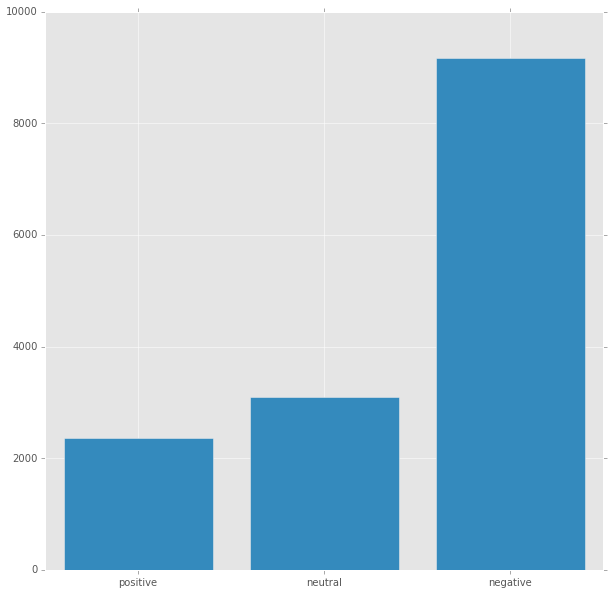

In [138]:
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use('ggplot')
%matplotlib inline

sentiment = Counter(df['airline_sentiment']).keys()
counts = Counter(df['airline_sentiment']).values()
plt.figure(figsize=(10,10))
plt.bar([1,2,3], counts, align='center')
plt.xticks([1,2,3], sentiment)
plt.show();

In [139]:
df['text'][:20]

0                   @VirginAmerica What @dhepburn said.
1     @VirginAmerica plus you've added commercials t...
2     @VirginAmerica I didn't today... Must mean I n...
3     @VirginAmerica it's really aggressive to blast...
4     @VirginAmerica and it's a really big bad thing...
5     @VirginAmerica seriously would pay $30 a fligh...
6     @VirginAmerica yes, nearly every time I fly VX...
7     @VirginAmerica Really missed a prime opportuni...
8       @virginamerica Well, I didn't…but NOW I DO! :-D
9     @VirginAmerica it was amazing, and arrived an ...
10    @VirginAmerica did you know that suicide is th...
11    @VirginAmerica I &lt;3 pretty graphics. so muc...
12    @VirginAmerica This is such a great deal! Alre...
13    @VirginAmerica @virginmedia I'm flying your #f...
14                               @VirginAmerica Thanks!
15        @VirginAmerica SFO-PDX schedule is still MIA.
16    @VirginAmerica So excited for my first cross c...
17    @VirginAmerica  I flew from NYC to SFO las

In [140]:
# Decode to UTF-8

df['text'] = df['text'].map(lambda x: x.decode('utf8'))

In [141]:
words = []
for i in range(len(df['text'])):
    words.append(df['text'][i].split())

import itertools
words = list(itertools.chain.from_iterable(words))
most_common = Counter(words).most_common()[:50]

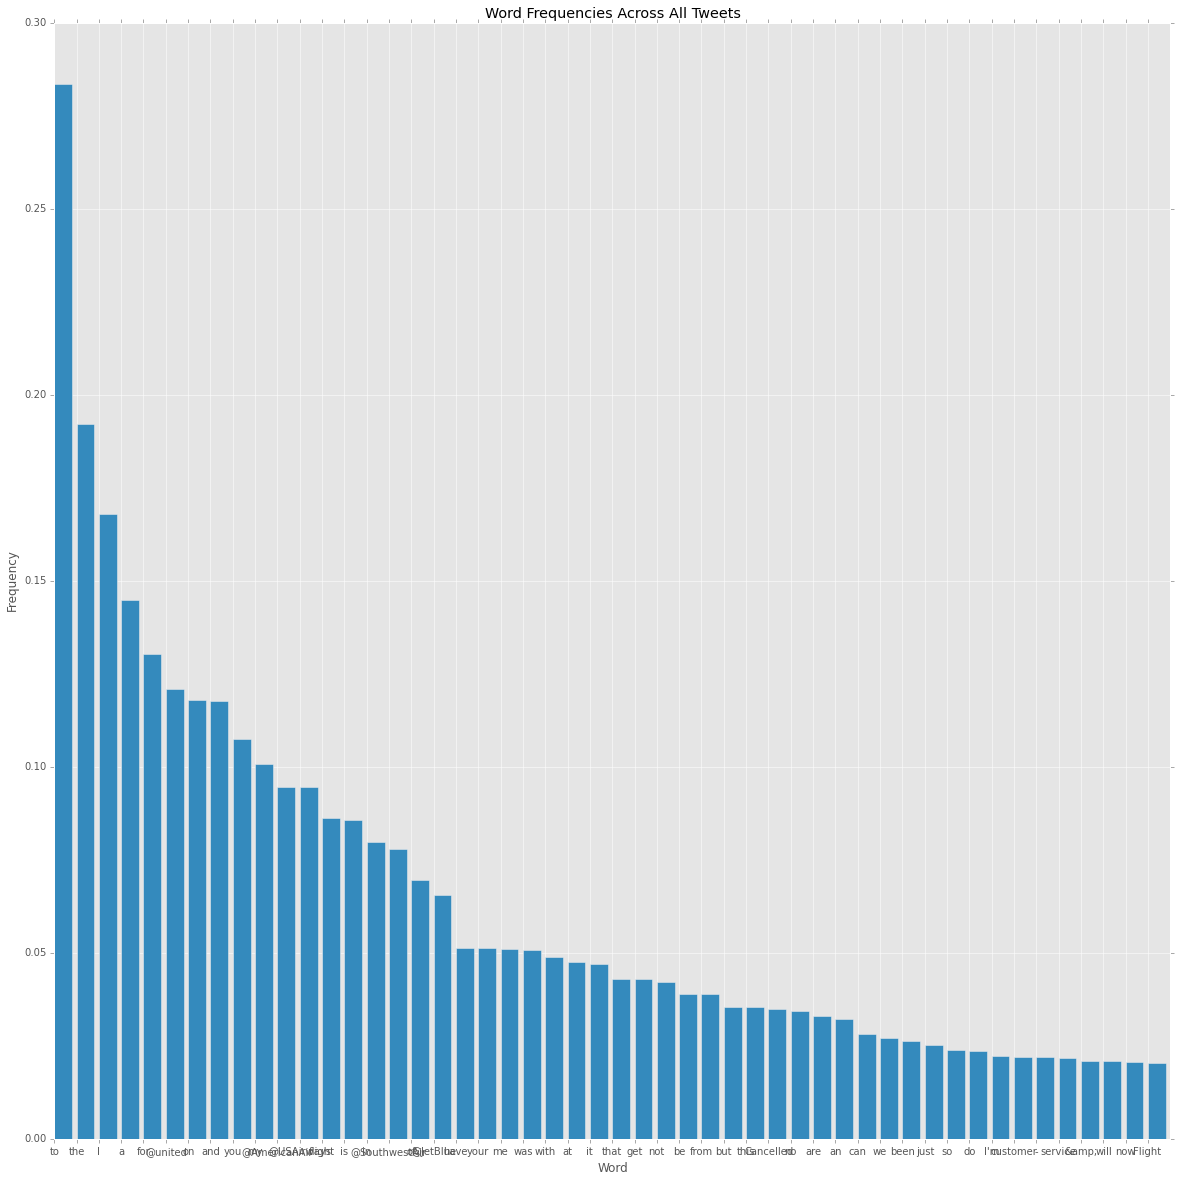

In [142]:
plt.figure(figsize=(20,20))
plt.bar(range(len(most_common)), [tup[1] / float(len(Counter(words))) for tup in most_common])
plt.xticks(range(len(most_common)), [tup[0] for tup in most_common])
plt.title("Word Frequencies Across All Tweets")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show();

## First pass at modeling

### Discuss vectorization methods

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [19]:
from sklearn.cross_validation import KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vocab_vectorizer = CountVectorizer()
vocab_vectorizer.fit_transform(df['text'])

print("There are {:,} total words in the vocabulary.".format(len(vocab_vectorizer.vocabulary_)))

There are 15,051 total words in the vocabulary.


### Bernoulli Naive Bayes

In [9]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

bnb = BernoulliNB()

### Multinomial Naive Bayes

In [10]:
mnb = MultinomialNB()

### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

### Support Vector Classifier

In [12]:
from sklearn.svm import SVC

svc = SVC(kernel = 'poly')

### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

### Boosted Classifiers

In [14]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ada = AdaBoostClassifier()

In [17]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score,accuracy_score, roc_curve

def cross_validated_metric(estimator, metric, data, target):
    """
    Input: Instance of estimator, metric: ['F1 Score', 'accuracy'], data, target
    
    Output: 10-fold cross-validated metric of input estimator
    
    """
    
    if metric == 'F1 score':
        cv_metric = f1_score
            
    elif metric == 'accuracy':
        cv_metric = accuracy_score
        
    vectorizer = CountVectorizer()
                
    scores = []
    for i in xrange(10):
                
        train_data, test_data, train_target, test_target = train_test_split(data, target)
        
        vectorized_train_data = vectorizer.fit_transform(train_data)
        vectorized_train_data 
        
        estimator.fit(vectorized_train_data, train_target)
        
        pred_target = estimator.predict(vectorizer.transform(test_data))
        
        ## Unartful hack for weighted F1-Score in multiclass case
        if len(set(target)) == 3 and cv_metric == f1_score:
            scores.append(cv_metric(test_target, pred_target, average='weighted'))
        else:
            scores.append(cv_metric(test_target, pred_target))
        
    return ("The cross-validated {} on the test data from {} is {:.4}".format(metric, \
                                                                    estimator.__class__.__name__, np.mean(scores)))  

### Cross-validated results WITHOUT feature engineering

In [18]:
for estimator in [mnb, bnb, lr, svc, rf]:
    print(cross_validated_metric(estimator, 'accuracy', df['text'], df['airline_sentiment']))
    print

The cross-validated accuracy on the test data from MultinomialNB is 0.7665

The cross-validated accuracy on the test data from BernoulliNB is 0.7678

The cross-validated accuracy on the test data from LogisticRegression is 0.8059

The cross-validated accuracy on the test data from SVC is 0.6249

The cross-validated accuracy on the test data from RandomForestClassifier is 0.7352



## Feature engineering

In [143]:
# Make lowercase, "stem" hashtags by removing hash key, remove @mentions
import re

df['text'] = df['text'].map(lambda x: x.lower()).map(lambda x: x.replace('\\',' '))
df['text'] = df['text'].map(lambda x: x.replace('#','')).map(lambda x: re.sub(r'@[A-Za-z]+', ' ', x))

In [155]:
# Parse emoji

df['text'] = df['text'].map(lambda x: re.sub(ur'([\u2000-\u3000]+)', ur'\1 ', x))

In [22]:
# Add negation features

def negate_sequence(text):
    negation = False
    delims = "?.,!:;"
    result = []
    words = text.split()
    for word in words:
        stripped = word.strip(delims).lower()
        negated = "not_" + stripped if negation else stripped
 
        if word.endswith(("not", "n't ", "no")):
#         if any(neg in word for neg in ["not", "n't ", "no"]):
            negation = not negation
            

        if any(c in word for c in delims):
            negation = False
        
        
        result.append(negated)
    return ' '.join(result)

df['text'] = df['text'].map(lambda x: negate_sequence(x))

In [23]:
# Decrease noise by removing numbers

df['text'] = df['text'].map(lambda x: re.sub(r'[0-9]', '', x))

In [24]:
df['text'][:20]

0                                             what said
1     plus you've added commercials to the experienc...
2     i didn't today must mean i need to take anothe...
3     it's really aggressive to blast obnoxious "ent...
4              and it's a really big bad thing about it
5     seriously would pay $ a flight for seats that ...
6     yes nearly every time i fly vx this “ ear worm...
7     really missed a prime opportunity for men with...
8                        well i didn't… but now i do -d
9     it was amazing and arrived an hour early you'r...
10    did you know that suicide is the second leadin...
11    i &lt; pretty graphics so much better than min...
12    this is such a great deal already thinking abo...
13    i'm flying your fabulous seductive skies again...
14                                               thanks
15                        sfo-pdx schedule is still mia
16    so excited for my first cross country flight l...
17    i flew from nyc to sfo last week and could

### Create separate column 'words' which are alphabetical text only 

In [25]:
df['words'] = df['text'].map(lambda x: re.sub(r'[^A-Za-z]', ' ', x))

In [26]:
df['words'][:20]

0                                             what said
1     plus you ve added commercials to the experienc...
2     i didn t today must mean i need to take anothe...
3     it s really aggressive to blast obnoxious  ent...
4              and it s a really big bad thing about it
5     seriously would pay   a flight for seats that ...
6     yes nearly every time i fly vx this   ear worm...
7     really missed a prime opportunity for men with...
8                        well i didn t  but now i do  d
9     it was amazing and arrived an hour early you r...
10    did you know that suicide is the second leadin...
11    i  lt  pretty graphics so much better than min...
12    this is such a great deal already thinking abo...
13    i m flying your fabulous seductive skies again...
14                                               thanks
15                        sfo pdx schedule is still mia
16    so excited for my first cross country flight l...
17    i flew from nyc to sfo last week and could

### Cross-validated results WITH feature engineering

In [27]:
for estimator in [mnb, bnb, lr, svc, rf]:
    print(cross_validated_metric(estimator, 'accuracy', df['text'], df['airline_sentiment']))
    print

The cross-validated accuracy on the test data from MultinomialNB is 0.7708

The cross-validated accuracy on the test data from BernoulliNB is 0.7743

The cross-validated accuracy on the test data from LogisticRegression is 0.8018

The cross-validated accuracy on the test data from SVC is 0.6264

The cross-validated accuracy on the test data from RandomForestClassifier is 0.7369



### Cross-validated results WITH feature engineering on 'words'

In [28]:
for estimator in [mnb, bnb, lr]:
    print(cross_validated_metric(estimator, 'accuracy', df['words'], df['airline_sentiment']))
    print

The cross-validated accuracy on the test data from MultinomialNB is 0.7737

The cross-validated accuracy on the test data from BernoulliNB is 0.7795

The cross-validated accuracy on the test data from LogisticRegression is 0.802



## Restrict sentiments to either positive or negative

In [29]:
dfNew = df[df['airline_sentiment'] != 'neutral']
dfNew = dfNew.replace(to_replace=['negative', 'positive'], value=[0,1] )

### Cross-validated results on binary classification on 'text'

In [30]:
for estimator in [mnb, bnb, lr]:
    print(cross_validated_metric(estimator, 'accuracy', dfNew['text'], dfNew['airline_sentiment']))
    print

The cross-validated accuracy on the test data from MultinomialNB is 0.9082

The cross-validated accuracy on the test data from BernoulliNB is 0.9109

The cross-validated accuracy on the test data from LogisticRegression is 0.9225



### Cross-validated results on binary classification on 'words'

In [31]:
for estimator in [mnb, bnb, lr]:
    print(cross_validated_metric(estimator, 'accuracy', dfNew['words'], dfNew['airline_sentiment']))
    print

The cross-validated accuracy on the test data from MultinomialNB is 0.9091

The cross-validated accuracy on the test data from BernoulliNB is 0.9088

The cross-validated accuracy on the test data from LogisticRegression is 0.9212



### Grid Search

In [33]:
train_data2, test_data2, train_target2, test_target2 = train_test_split(dfNew['text'], dfNew['airline_sentiment'])


vectorizer = CountVectorizer()
vectorized_train_data2 = vectorizer.fit_transform(train_data2)

In [34]:
from sklearn.grid_search import GridSearchCV

lr_parameters = {'penalty': ('l1','l2'),'C':[0.5, 1.0, 2.0], 'solver': ('newton-cg', 'lbfgs', 'liblinear')}

grid = grid_search = GridSearchCV(lr, lr_parameters)

grid.fit(vectorized_train_data2,train_target2)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': [0.5, 1.0, 2.0], 'solver': ('newton-cg', 'lbfgs', 'liblinear')},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [35]:
grid_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

grid_lr.fit(vectorized_train_data2,train_target2)

pred_target = grid_lr.predict(vectorizer.transform(test_data2))

### Cross-validated results on LogisticRegression with GridSearch optimal parameters

In [36]:
print("On 'text':") , cross_validated_metric(grid_lr, 'accuracy', dfNew['text'], dfNew['airline_sentiment'])
print
print("On 'words':") , cross_validated_metric(grid_lr, 'accuracy', dfNew['words'], dfNew['airline_sentiment'])

On 'text': The cross-validated accuracy on the test data from LogisticRegression is 0.9228

On 'words': The cross-validated accuracy on the test data from LogisticRegression is 0.922


In [37]:
fpr, tpr, thresholds = roc_curve(test_target2, pred_target, pos_label=1)

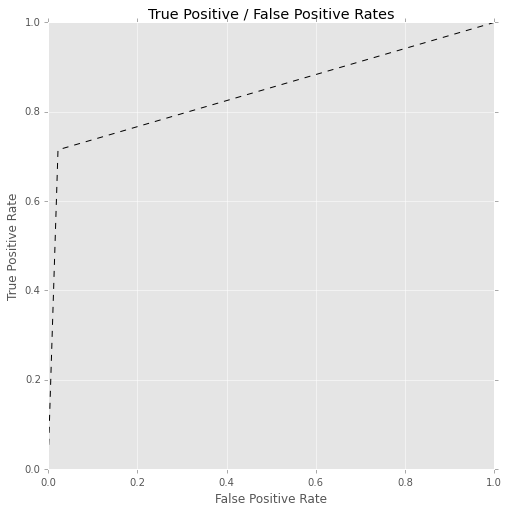

In [38]:
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, 'k--')
plt.title('True Positive / False Positive Rates')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

### Feature importance ranking

In [91]:
def most_informative_feature(vectorizer, classifier, n):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[-n:]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[:n]

    for coef, feat in sorted((topn_class1),reverse=True):
        print(class_labels[1], coef, feat)

    print
    print
    for coef, feat in sorted((topn_class2),reverse=True):
        print (class_labels[0], coef, feat)


most_informative_feature(vectorizer, lr, n=20)

(1, 3.6040030070203719, u'preferences')
(1, 2.9174646862724543, u'premiere')
(1, 2.8252884019180278, u'attitudy')
(1, 2.5709721191456918, u'shower')
(1, 2.5091328489677469, u'grounded')
(1, 2.4289819341938963, u'mac')
(1, 2.2619371817422897, u'alison')
(1, 2.1964110160701811, u'lastflightofthenight')
(1, 2.1416369620741591, u'becuz')
(1, 2.0669142135440262, u'shopping')
(1, 2.0512846961754727, u'expenses')
(1, 2.0375444687851463, u'corevalues')
(1, 1.9140986236955784, u'preflight')
(1, 1.913376444921133, u'include')
(1, 1.7734793752435172, u'prom')
(1, 1.760241815868828, u'experiencing')
(1, 1.7050968625545166, u'answerphone')
(1, 1.6472842097008966, u'not_meals')
(1, 1.4918204962465043, u'not_flightlations')
(1, 1.4208531763249108, u'goyxtmj')


(0, -1.3048558633131253, u'offensively')
(0, -1.331788137933922, u'not_worthy')
(0, -1.3492711394147177, u'argueing')
(0, -1.3691777110362939, u'pr')
(0, -1.3989386747495671, u'hungry')
(0, -1.4011944041532773, u'double')
(0, -1.40205789388547

## Future Ideas

** Better emoji parsing**

**More visualization of correlated features**

**Unsupervised clustering**

** word2vec**

## Summary

**In my project, I ultimately chose logistic regression to classify tweet sentiment into 'positive' and 'negative' classes. A model was fit to the training data and scored against the test data, resulting in the cross-validated accuracy score of just over 92%. The logistic regression classifier showed that it is a powerful classification technique and has wide-ranging applications, including text classification. **

## LogisticRegression Annotation

** Student comments marked by '### MP'. Since the LogisticRegression class is somewhat light on the fit() and predict() methods, a brief discussion of logistic regression is provided below to demonstrate proficiency with the concept. **

In [ ]:
class LogisticRegression(BaseEstimator, LinearClassifierMixin,
                         _LearntSelectorMixin, SparseCoefMixin):
    """Logistic Regression (aka logit, MaxEnt) classifier.
    In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
    scheme if the 'multi_class' option is set to 'ovr' and uses the
    cross-entropy loss, if the 'multi_class' option is set to 'multinomial'.
    (Currently the 'multinomial' option is supported only by the 'lbfgs' and
    'newton-cg' solvers.)
    This class implements regularized logistic regression using the
    `liblinear` library, newton-cg and lbfgs solvers. It can handle both
    dense and sparse input. Use C-ordered arrays or CSR matrices containing
    64-bit floats for optimal performance; any other input format will be
    converted (and copied).
    The newton-cg and lbfgs solvers support only L2 regularization with primal
    formulation. The liblinear solver supports both L1 and L2 regularization,
    with a dual formulation only for the L2 penalty.
    Read more in the :ref:`User Guide <logistic_regression>`.
    Parameters
    ----------
    penalty : str, 'l1' or 'l2'
        Used to specify the norm used in the penalization. The newton-cg and
        lbfgs solvers support only l2 penalties.
    dual : bool
        Dual or primal formulation. Dual formulation is only implemented for
        l2 penalty with liblinear solver. Prefer dual=False when
        n_samples > n_features.
    C : float, optional (default=1.0)
        Inverse of regularization strength; must be a positive float.
        Like in support vector machines, smaller values specify stronger
        regularization.
    fit_intercept : bool, default: True
        Specifies if a constant (a.k.a. bias or intercept) should be
        added to the decision function.
    intercept_scaling : float, default: 1
        Useful only if solver is liblinear.
        when self.fit_intercept is True, instance vector x becomes
        [x, self.intercept_scaling],
        i.e. a "synthetic" feature with constant value equals to
        intercept_scaling is appended to the instance vector.
        The intercept becomes intercept_scaling * synthetic feature weight
        Note! the synthetic feature weight is subject to l1/l2 regularization
        as all other features.
        To lessen the effect of regularization on synthetic feature weight
        (and therefore on the intercept) intercept_scaling has to be increased.
    class_weight : dict or 'balanced', optional
        Weights associated with classes in the form ``{class_label: weight}``.
        If not given, all classes are supposed to have weight one.
        The "balanced" mode uses the values of y to automatically adjust
        weights inversely proportional to class frequencies in the input data
        as ``n_samples / (n_classes * np.bincount(y))``
        Note that these weights will be multiplied with sample_weight (passed
        through the fit method) if sample_weight is specified.
        .. versionadded:: 0.17
           *class_weight='balanced'* instead of deprecated *class_weight='auto'*.
    max_iter : int
        Useful only for the newton-cg, sag and lbfgs solvers.
        Maximum number of iterations taken for the solvers to converge.
    random_state : int seed, RandomState instance, or None (default)
        The seed of the pseudo random number generator to use when
        shuffling the data.
    solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag'}
        Algorithm to use in the optimization problem.
        - For small datasets, 'liblinear' is a good choice, whereas 'sag' is
            faster for large ones.
        - For multiclass problems, only 'newton-cg' and 'lbfgs' handle
            multinomial loss; 'sag' and 'liblinear' are limited to
            one-versus-rest schemes.
        - 'newton-cg', 'lbfgs' and 'sag' only handle L2 penalty.
        Note that 'sag' fast convergence is only guaranteed on features with
        approximately the same scale. You can preprocess the data with a
        scaler from sklearn.preprocessing.
        .. versionadded:: 0.17
           Stochastic Average Gradient descent solver.
    tol : float, optional
        Tolerance for stopping criteria.
    multi_class : str, {'ovr', 'multinomial'}
        Multiclass option can be either 'ovr' or 'multinomial'. If the option
        chosen is 'ovr', then a binary problem is fit for each label. Else
        the loss minimised is the multinomial loss fit across
        the entire probability distribution. Works only for the 'lbfgs'
        solver.
    verbose : int
        For the liblinear and lbfgs solvers set verbose to any positive
        number for verbosity.
    warm_start : bool, optional
        When set to True, reuse the solution of the previous call to fit as
        initialization, otherwise, just erase the previous solution.
        Useless for liblinear solver.
        .. versionadded:: 0.17
           *warm_start* to support *lbfgs*, *newton-cg*, *sag* solvers.
    n_jobs : int, optional
        Number of CPU cores used during the cross-validation loop. If given
        a value of -1, all cores are used.
    Attributes
    ----------
    coef_ : array, shape (n_classes, n_features)
        Coefficient of the features in the decision function.
    intercept_ : array, shape (n_classes,)
        Intercept (a.k.a. bias) added to the decision function.
        If `fit_intercept` is set to False, the intercept is set to zero.
    n_iter_ : array, shape (n_classes,) or (1, )
        Actual number of iterations for all classes. If binary or multinomial,
        it returns only 1 element. For liblinear solver, only the maximum
        number of iteration across all classes is given.
    See also
    --------
    SGDClassifier : incrementally trained logistic regression (when given
        the parameter ``loss="log"``).
    sklearn.svm.LinearSVC : learns SVM models using the same algorithm.
    Notes
    -----
    The underlying C implementation uses a random number generator to
    select features when fitting the model. It is thus not uncommon,
    to have slightly different results for the same input data. If
    that happens, try with a smaller tol parameter.
    Predict output may not match that of standalone liblinear in certain
    cases. See :ref:`differences from liblinear <liblinear_differences>`
    in the narrative documentation.
    References
    ----------
    LIBLINEAR -- A Library for Large Linear Classification
        http://www.csie.ntu.edu.tw/~cjlin/liblinear/
    Hsiang-Fu Yu, Fang-Lan Huang, Chih-Jen Lin (2011). Dual coordinate descent
        methods for logistic regression and maximum entropy models.
        Machine Learning 85(1-2):41-75.
        http://www.csie.ntu.edu.tw/~cjlin/papers/maxent_dual.pdf
    """

    def __init__(self, penalty='l2', dual=False, tol=1e-4, C=1.0,
                 fit_intercept=True, intercept_scaling=1, class_weight=None,
                 random_state=None, solver='liblinear', max_iter=100,
                 multi_class='ovr', verbose=0, warm_start=False, n_jobs=1):

        self.penalty = penalty
        self.dual = dual
        self.tol = tol
        self.C = C
        self.fit_intercept = fit_intercept
        self.intercept_scaling = intercept_scaling
        self.class_weight = class_weight
        self.random_state = random_state
        self.solver = solver
        self.max_iter = max_iter
        self.multi_class = multi_class
        self.verbose = verbose
        self.warm_start = warm_start
        self.n_jobs = n_jobs

    def fit(self, X, y, sample_weight=None):
        """Fit the model according to the given training data.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            Training vector, where n_samples in the number of samples and
            n_features is the number of features.
        y : array-like, shape (n_samples,)
            Target vector relative to X.
        sample_weight : array-like, shape (n_samples,) optional
            Array of weights that are assigned to individual samples.
            If not provided, then each sample is given unit weight.
            .. versionadded:: 0.17
               *sample_weight* support to LogisticRegression.
        Returns
        -------
        self : object
            Returns self.
        """
        
        ### MP: Raise ValueError statements for basic housekeeping (bad parameter values)
        if not isinstance(self.C, numbers.Number) or self.C < 0:
            raise ValueError("Penalty term must be positive; got (C=%r)"
                             % self.C)
        if not isinstance(self.max_iter, numbers.Number) or self.max_iter < 0:
            raise ValueError("Maximum number of iteration must be positive;"
                             " got (max_iter=%r)" % self.max_iter)
        if not isinstance(self.tol, numbers.Number) or self.tol < 0:
            raise ValueError("Tolerance for stopping criteria must be "
                             "positive; got (tol=%r)" % self.tol)

        X, y = check_X_y(X, y, accept_sparse='csr', dtype=np.float64, 
                         order="C")
        check_classification_targets(y)
        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape

        _check_solver_option(self.solver, self.multi_class, self.penalty,
                             self.dual, sample_weight)
        
        ### MP: Depending on the user input, any one of a number of solver algorithms will be employed.
        ### The distinction is in how they solve the optimization problem. Since many are unfamiliar,
        ### Only 'liblinear' (one vs. rest) and 'lbfgs' (multinomial) will be described.
        if self.solver == 'liblinear':
            
            ### MP: This is where the intercepts are fitted with an import statement from ..svm.base._fit_liblinear
            ### Similar to any generic linear model, the weights are fit to minimize squared error 
            ### between the model and data. See below for modeling specific to logistic regression
            self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
                X, y, self.C, self.fit_intercept, self.intercept_scaling,
                self.class_weight, self.penalty, self.dual, self.verbose,
                self.max_iter, self.tol, self.random_state)
            self.n_iter_ = np.array([n_iter_])
            return self

        max_squared_sum = get_max_squared_sum(X) if self.solver == 'sag' \
            else None

        n_classes = len(self.classes_)
        classes_ = self.classes_
        if n_classes < 2:
            raise ValueError("This solver needs samples of at least 2 classes"
                             " in the data, but the data contains only one"
                             " class: %r" % classes_[0])

        if len(self.classes_) == 2:
            n_classes = 1
            classes_ = classes_[1:]

        if self.warm_start:
            warm_start_coef = getattr(self, 'coef_', None)
        else:
            warm_start_coef = None
        if warm_start_coef is not None and self.fit_intercept:
            warm_start_coef = np.append(warm_start_coef,
                                        self.intercept_[:, np.newaxis],
                                        axis=1)

        self.coef_ = list()
        self.intercept_ = np.zeros(n_classes)

        # Hack so that we iterate only once for the multinomial case.
        if self.multi_class == 'multinomial':
            classes_ = [None]
            warm_start_coef = [warm_start_coef]

        if warm_start_coef is None:
            warm_start_coef = [None] * n_classes

        path_func = delayed(logistic_regression_path)

        # The SAG solver releases the GIL so it's more efficient to use
        # threads for this solver.
        backend = 'threading' if self.solver == 'sag' else 'multiprocessing'
        fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
                               backend=backend)(
            path_func(X, y, pos_class=class_, Cs=[self.C],
                      fit_intercept=self.fit_intercept, tol=self.tol,
                      verbose=self.verbose, solver=self.solver, copy=False,
                      multi_class=self.multi_class, max_iter=self.max_iter,
                      class_weight=self.class_weight, check_input=False,
                      random_state=self.random_state, coef=warm_start_coef_,
                      max_squared_sum=max_squared_sum,
                      sample_weight=sample_weight)
            for (class_, warm_start_coef_) in zip(classes_, warm_start_coef))

        fold_coefs_, _, n_iter_ = zip(*fold_coefs_)
        self.n_iter_ = np.asarray(n_iter_, dtype=np.int32)[:, 0]

        if self.multi_class == 'multinomial':
            self.coef_ = fold_coefs_[0][0]
        else:
            self.coef_ = np.asarray(fold_coefs_)
            self.coef_ = self.coef_.reshape(n_classes, n_features +
                                            int(self.fit_intercept))
        ### MP: If fit_intercept is True (default), the model is fit with an intercept. If False, no intercept
        if self.fit_intercept:
            self.intercept_ = self.coef_[:, -1]
            self.coef_ = self.coef_[:, :-1]
            
        ### MP: Execute method, return
        return self

    def predict_proba(self, X):
        """Probability estimates.
        The returned estimates for all classes are ordered by the
        label of classes.
        For a multi_class problem, if multi_class is set to be "multinomial"
        the softmax function is used to find the predicted probability of
        each class.
        Else use a one-vs-rest approach, i.e calculate the probability
        of each class assuming it to be positive using the logistic function.
        and normalize these values across all the classes.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
        Returns
        -------
        T : array-like, shape = [n_samples, n_classes]
            Returns the probability of the sample for each class in the model,
            where classes are ordered as they are in ``self.classes_``.
        """
        if not hasattr(self, "coef_"):
            raise NotFittedError("Call fit before prediction")
            
        ### MP: If the height of the coefficient vector is one or if the user selects one vs. rest, 
        ### calculate_ovr = True
        calculate_ovr = self.coef_.shape[0] == 1 or self.multi_class == "ovr"
        
        if calculate_ovr:
            
            ### MP: If True, Probabilities are calculated in the usual way as with other logistic 
            ### regression problems
            return super(LogisticRegression, self)._predict_proba_lr(X)

        else:
            
            ### MP: Else, return the softmax solution to the problem, the generalization of logistic
            ### regression problem, given below
            return softmax(self.decision_function(X), copy=False)

    def predict_log_proba(self, X):
        """Log of probability estimates.
        The returned estimates for all classes are ordered by the
        label of classes.
        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
        Returns
        -------
        T : array-like, shape = [n_samples, n_classes]
            Returns the log-probability of the sample for each class in the
            model, where classes are ordered as they are in ``self.classes_``.
        """
        
        ### MP: Similiar to above function, only now the values returned are the log probabilities
        return np.log(self.predict_proba(X))

### General Discussion  on Logistic Regression

The hypothesis can be stated to the probability that the response variable belongs to some class.

**Hypothesis:** 

$$ {\bf{h_{\theta}}}x = \frac{e^{x^T \theta}}{1 + e^{x^T \theta}} = \frac{1}{1 + e^{-x^T \theta}} $$ 

where $\theta$ is a vector comprising the weights or coefficients of your model.

Softmax: the general form in the case of $K$ distinct linear functions, where the response variable can belong to any one of $j$ classes:

$${\bf{h_{\theta_j}}}x = \frac{e^{x^T \theta_j}}{\sum_{k=1}^K e^{x^T \theta_k}}$$

**Cost: **

$$ {\bf{J_{\theta}}} = - \frac{1}{n} \left( \sum_{i = 1}^{n} y^{(i)} log({\bf{h_{\theta}}}x^{(i)}) + (1 - y^{(i)}) log(1 - {\bf{h_{\theta}}}x^{(i)}) \right)$$

**Optimization:**

The optimization function to the problem is found by taking the partial derivative of the cost function with respect to each of the weights; that is, the gradient of the cost function.

$$\frac{\partial}{\partial {\bf{\theta_j}}}{\bf{J_{\theta}}} =-\frac{1}{n} \sum_{i=1}^{n} \left( y^{(i)} - p(x^{(i)}) \right) x_{j}^{(i)} $$

where $x_{j}^{(i)} = 1$ (intercept) if $j = 0$ and $x_{j}^{(i)} = x^{(i)}$ if $j = 1$